In [1]:
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
from openpiv import tools, pyprocess, validation, filters, scaling 

In [2]:
folder = '/home/user/PIV/PIV-main'

    
Data = np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
    delimiter='	',
    names=True,
    dtype=None)

np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
    delimiter='	',
    names=True,
    dtype=None)

array([( 0.8793,  0.9694, 0.0069, -0.0256, 0., 0.),
       ( 1.24  ,  0.9694, 0.008 , -0.0229, 0., 0.),
       ( 1.6007,  0.9694, 0.0115, -0.0192, 0., 0.), ...,
       (43.0837, 44.256 , 0.0112,  0.0369, 0., 0.),
       (43.4444, 44.256 , 0.0128,  0.0384, 0., 0.),
       (43.8051, 44.256 , 0.0075,  0.0386, 0., 0.)],
      dtype=[('x', '<f8'), ('y', '<f8'), ('u', '<f8'), ('v', '<f8'), ('s2n', '<f8'), ('mask', '<f8')])

In [3]:
# The two-dimensional domain of the fit.
X, Y = Data['x'], Data['y']


# The function to be fit is u [n x m]
u_mean = Data['u']
v_mean = Data['v']

# The mathematical approximation function is U:
def U(x, y, A, B):
  return (A/(x)) * np.exp(-((y)**2)/((B*(x))**2))
# return (A/(x-x0)) * np.exp(-(y-y0)**2/(B*(x-x0)))


# This is the callable that is passed to curve_fit.M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def func(M, *args):
  xx, yy = M
  arr = np.zeros(xx.shape)
  arr += U(xx, yy, *args)
  return arr

# origin of the nozzle
x0 = 45/2 + 80  # 45/2 sarebbe il centro della finestra + 80mm distanza dall'ugello [ref PIV challenge]
y0 = 45/2       # CHECK!!!!!!!!!!!!!!!!!


In [64]:
max(u_mean)*22.18


1.610268

In [4]:
# Initial guess of the parameters
u_max = max(u_mean)
max_index = np.where(u_mean == u_max)

A0 = 1
B0 = 1
p0 = [A0, B0]


In [46]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
coord = np.vstack((-X + x0, Y - y0))

# LEAST SQUARES
p_opt, p_cov = curve_fit(func, coord, u_mean, p0)
# delta = 1000
 #while delta > 70:
 #   p_opt, p_cov = curve_fit(func, coord, u_mean, p_opt)
  #  delta = abs(p_opt[0] - p0[0])

print('Fitted parameters:')
print(p_opt)
print()
print(-6094/p_opt[0])
print()
print(-0.1313/p_opt[1])

Fitted parameters:
[-2.43893407e+02 -9.78285182e-02]

24.98632529867241

1.3421444223683765


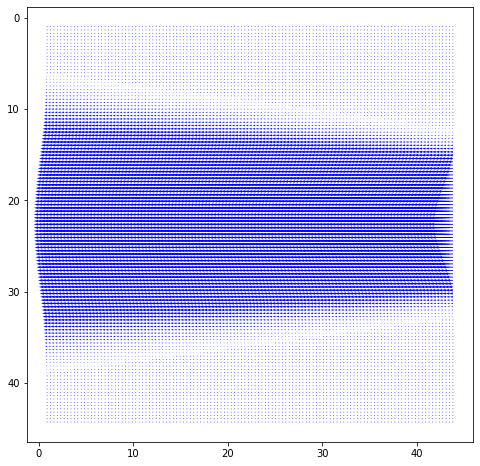

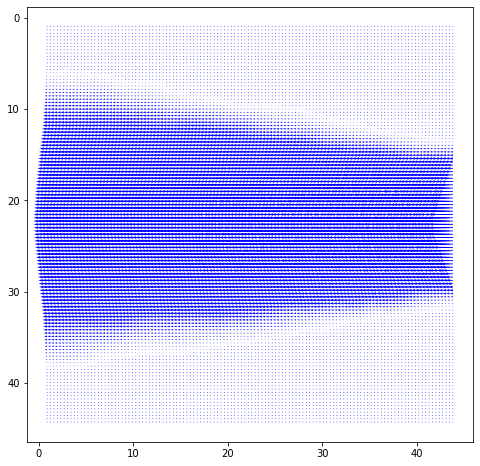

In [47]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel




#save in the simple ASCII table format
vmean = np.zeros(X.shape)
mask = np.zeros(X.shape, dtype=bool)
snr = np.zeros(X.shape)
U_mean = func(coord, p_opt[0], p_opt[1])
tools.save(X, Y, U_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_th.txt' )
tools.save(X, Y, u_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_exp.txt' )

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_th.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 80, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_exp.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 80, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

In [48]:
#fit = np.zeros(Z.shape)
#fit +=  U(X, Y, x0, y0, p_opt[0], p_opt[1])
rms = np.sqrt(np.mean((u_mean - U_mean)**2))
print('RMS residual =', rms)

RMS residual = 0.07841566342810226


In [49]:
# mean centerline  velocity
# A == p_opt[0]
def U_centerline(x, x0, A):
  return A/(x-x0) 

# mean jet width
# B == p_opt[1]
def jet_width(x, x0, B):
  return (x-x0)*B

# reduced radial coordinate
def similarity_variable(y, y0, *args):
  width = args
  return (y-y0)/width

In [50]:
# My field 
x1 = X[0]
y1 = Y[0]
n = np.sum(X==x1)
m = np.sum(Y==y1)

print(n) # intervalli in y
print(m) # intervalli in x

121
120


In [51]:
X_1 = X.reshape(n,m)
print(X_1)

print()
print()
print()

Y_1 = Y.reshape(n,m)
print(Y_1)

print()
print()
print()

U_1 = u_mean.reshape(n,m)
print(U_1)

print()
print()
print()

V_1 = v_mean.reshape(n,m)
print(V_1)

[[ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 ...
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]]



[[ 0.9694  0.9694  0.9694 ...  0.9694  0.9694  0.9694]
 [ 1.3302  1.3302  1.3302 ...  1.3302  1.3302  1.3302]
 [ 1.6909  1.6909  1.6909 ...  1.6909  1.6909  1.6909]
 ...
 [43.5346 43.5346 43.5346 ... 43.5346 43.5346 43.5346]
 [43.8953 43.8953 43.8953 ... 43.8953 43.8953 43.8953]
 [44.256  44.256  44.256  ... 44.256  44.256  44.256 ]]



[[ 0.0069  0.008   0.0115 ...  0.0309  0.0327  0.0357]
 [ 0.0064  0.0058  0.0089 ...  0.0329  0.0337  0.032 ]
 [-0.0005 -0.0008  0.0023 ...  0.0312  0.0321  0.0301]
 ...
 [ 0.0486  0.0503  0.0584 ...  0.0101  0.0143  0.0056]
 [ 0.0513  0.0566  0.0619 ...  0.0106  0.015   0.0061]
 [ 0.0507  0.0613  0.0683 ...  0.0112  0.0

x = 43.8051 mm
x = 22.5225 mm
x = 1.24 mm


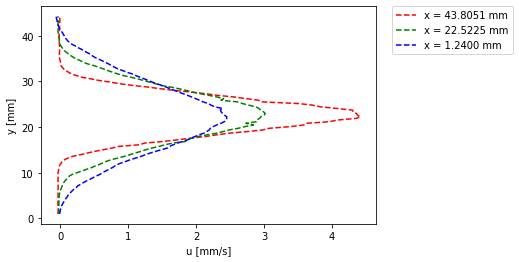

In [52]:
# Plot some velocity profile at different x
m1 = m - 1
x_1 = X_1[0,m1]
print('x =', x_1, 'mm')
y_1 = Y_1[:,0]
u_1 = U_1[:,m1]

m2 = m//2
x_2 = X_1[0,m2]
print('x =', x_2, 'mm')
y_2 = Y_1[:,0]
u_2 = U_1[:,m2]

m3 = 1
x_3 = X_1[0,m3]
print('x =', x_3, 'mm')
y_3 = Y_1[:,0]
u_3 = U_1[:,m3]


plt.plot(-u_1, y_1, 'r--', label='x = %.4f mm' %x_1)
plt.plot(-u_2, y_2, 'g--', label='x = %.4f mm' %x_2)
plt.plot(-u_3, y_3, 'b--', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('u [mm/s]')
plt.ylabel('y [mm]')
plt.show()


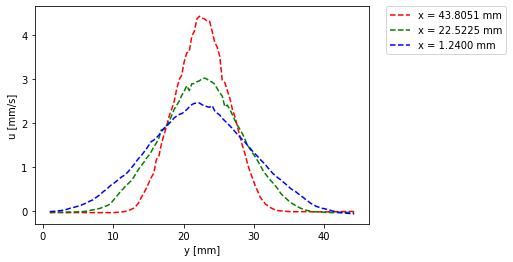

In [53]:
plt.plot(y_1, -u_1,'r--', label='x = %.4f mm' %x_1)
plt.plot(y_2,-u_2,  'g--', label='x = %.4f mm' %x_2)
plt.plot(y_3,-u_3, 'b--', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('y [mm]')
plt.ylabel('u [mm/s]')
plt.show()


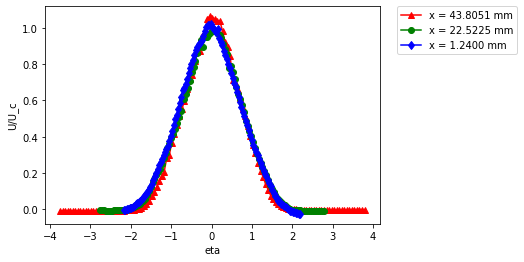

In [54]:
# Plot axial velocity on the similarity variable and adimensionalized by U_c 

U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -u_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -u_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -u_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()


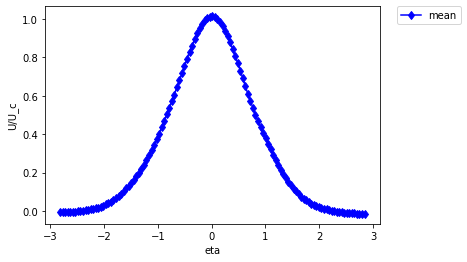

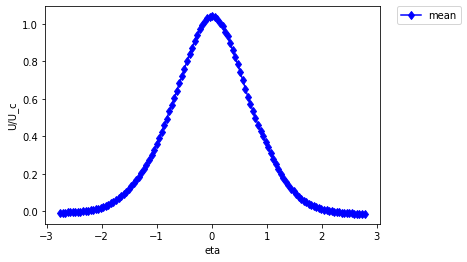

In [55]:
# Mean of the similarity profile on the mean of eta
SUM_fx = np.zeros(n)
SUM_y = np.zeros(n)
U_MEAN = np.zeros(n)
for i in range(n):
    U_MEAN[i] = np.mean(U_1[i,:])
    for j in range(m):
        SUM_fx[i] = SUM_fx[i] + U_1[i, j]/U_c[j]
        SUM_y[i] = SUM_y[i] + (Y_1[i, 0]- y0)/Width[j]

U_m = 1/m * SUM_fx
Eta_m = 1/m * SUM_y

plt.plot(Eta_m, -U_m, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

plt.plot(eta_2, -U_MEAN/U_c[m2], 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

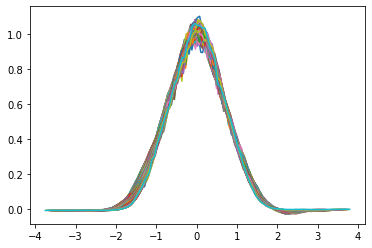

[[-2.16575076 -2.17346542 -2.18123523 ... -3.70412005 -3.72674409
  -3.74964619]
 [-2.12945809 -2.13704347 -2.14468309 ... -3.64204809 -3.66429301
  -3.68681132]
 [-2.09317549 -2.10063162 -2.10814107 ... -3.57999334 -3.60185923
  -3.62399388]
 ...
 [ 2.1158584   2.12339534  2.13098616 ...  3.61878831  3.64089116
   3.66326567]
 [ 2.15214101  2.15980719  2.16752818 ...  3.68084307  3.70332493
   3.72608312]
 [ 2.18842362  2.19621904  2.20407019 ...  3.74289782  3.76575871
   3.78890057]]




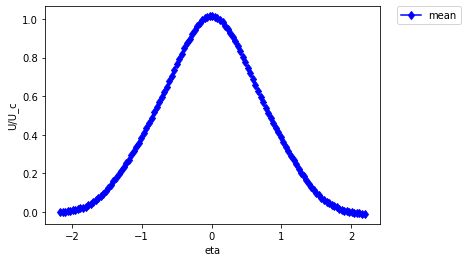

In [61]:
# Mean of the similarity profile on the single eta
ETA = np.zeros((n, m))
U_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        ETA[i, j] = similarity_variable(Y_1[i,0], y0, Width[j])
        U_normalized[i, j] = U_1[i, j]/U_c[j]
plt.plot(ETA, -U_normalized)
plt.show()
print(ETA)
print()
print()
#print(U_normalized)

Unorm_mean = np.zeros(n)
ETA0 = ETA[:,0]
U_x = np.zeros((n, m))
U_x[:,0] = U_normalized[:,0]
for s in range(m-1):
    U_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], U_normalized[:, s+1])
    
for t in range(n):
    Unorm_mean[t] = np.mean(U_x[t,:])
    
plt.plot(ETA0, -Unorm_mean, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

                
            

In [57]:
for t in range(n):
    for s in range(m-1):
        idx = (np.abs(ETA[:, s+1] - ETA0)).argmin()
        eta_temp = ETA[idx, s+1]
        if eta_temp < 0:
            if eta_temp - ETA0 > 0:
                eta_temp2 = ETA[idx+1, s+1]
            elif eta_temp - ETA0 < 0:
                eta_temp2 = ETA[idx-1, s+1]
        elif eta_temp > 0:
            if eta_temp - ETA0 > 0:
                eta_temp2 = ETA[idx-1, s+1]
            elif eta_temp - ETA0 < 0:
                eta_temp2 = ETA[idx+1, s+1]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

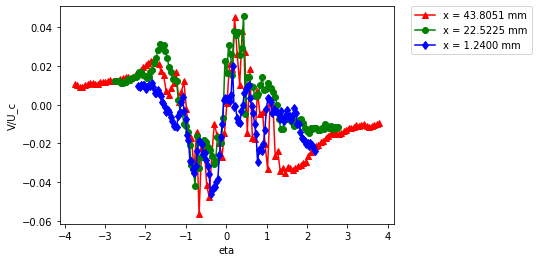

In [58]:
# Plot radial velocity on the similarity variable and adimensionalized by U_c

v_1 = V_1[:,m1]
v_2 = V_1[:,m2]
v_3 = V_1[:,m3]

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -v_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -v_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -v_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

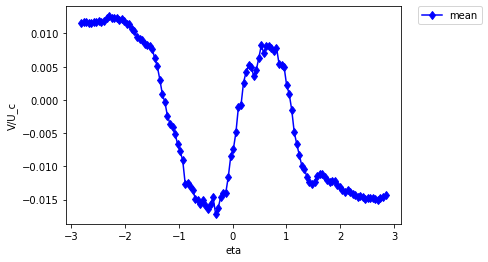

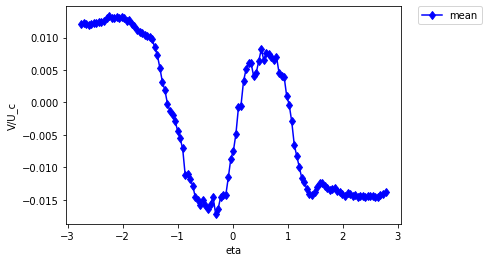

In [32]:
SUM_fy = np.zeros(n)
V_MEAN = np.zeros(n)
for i in range(n):
    V_MEAN[i] = np.mean(V_1[i,:])
    for j in range(m):
        SUM_fy[i] = SUM_fy[i] + V_1[i, j]/U_c[j]
        
V_m = 1/m * SUM_fy

plt.plot(Eta_m, -V_m, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

plt.plot(eta_2, -V_MEAN/U_c[m2], 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

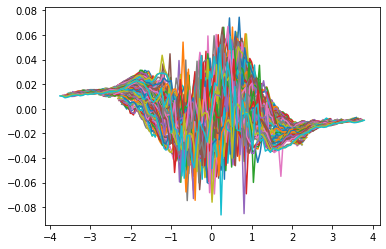

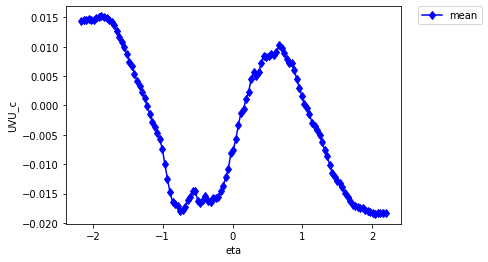

In [62]:
# Mean of the similarity profile on the single eta
V_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        V_normalized[i, j] = V_1[i, j]/U_c[j]
plt.plot(ETA, -V_normalized)
plt.show()

Vnorm_mean = np.zeros(n)
V_x = np.zeros((n, m))
V_x[:,0] = V_normalized[:,0]
for s in range(m-1):
    V_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], V_normalized[:, s+1])
    
for t in range(n):
    Vnorm_mean[t] = np.mean(V_x[t,:])
    
plt.plot(ETA0, -Vnorm_mean, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('UVU_c')
plt.show()

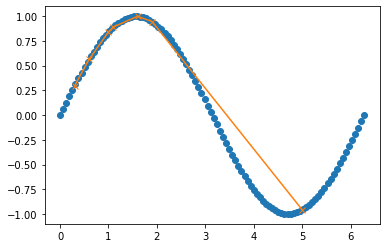

In [60]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
xvals = [0.3, 0.6, 1, 1.1 ,1.6 ,1.9 ,5]
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, 'o')

plt.plot(xvals, yinterp, '-x')

plt.show()

In [1]:
# Plot rms axial velocity fluctuations on the similarity variable and adimensionalized by U_c